In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from amftrack.pipeline.functions.post_processing.area_hulls import *
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    plot_hulls_skelet,
    plot_full,
    reconstruct_image_from_general,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
directory_targ = directory_project

update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/3432 [00:00<?, ?it/s]

In [3]:
plates = ["1048_20220506", "1045_20220504", "52_20220707", "84_20220621"]
# plates = ['1048_20220506','1045_20220504','84_20220621']
strain = ["C2", "C2", "A5", "A5"]
select = all_folders.loc[all_folders["unique_id"].isin(plates)]
# select = all_folders.loc[all_folders['unique_id']=='1045_20220504']

select = select.loc[select["/Analysis/skeleton_compressed.mat"] == True]

select = select.sort_values(by="datetime", ascending=True)

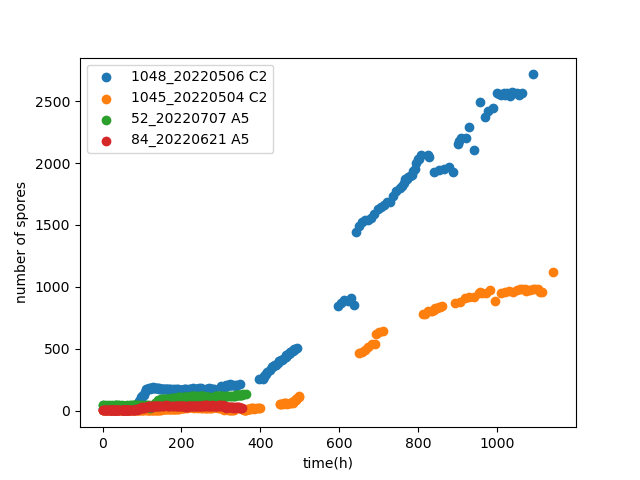

In [4]:
fig, ax = plt.subplots()
for j, plate in enumerate(plates):
    table = select.loc[select["unique_id"] == plate]
    table = table.sort_values(by="datetime", ascending=True)
    num_spore = []
    tot_spore_volume = []
    for i in range(len(table)):
        path = table["total_path"].iloc[i]
        spore_data = sio.loadmat(os.path.join(path, "Analysis", "spores.mat"))["spores"]
        num_spore.append(len(spore_data))
        tot_spore_volume.append(np.sum(4 / 3 * np.pi * (spore_data[:, 2] * 1.725) ** 3))
    ax.scatter(
        (table["datetime"] - table["datetime"].iloc[0]) / pd.Timedelta("1h"),
        num_spore,
        label=f"{plate} {strain[j]}",
    )
ax.set_xlabel("time(h)")
ax.set_ylabel("number of spores")
plt.legend()

In [5]:
analysis_info = get_analysis_info(directory_targ)

In [6]:
select = analysis_info.loc[analysis_info["Plate"] == "1048"]
import pickle

path_exp = f'{directory_targ}{select["path_exp"].iloc[0]}'
exp = pickle.load(open(path_exp, "rb"))

In [7]:
load_graphs(exp, directory_targ, range(10), post_process=True)

In [11]:
np.flip(spore_data[i, :2])

array([44299.65136719, 21887.26953125])

In [12]:
spore_data[i, :2]

array([21887.26953125, 44299.65136719])

In [27]:
exp.folders

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,unique_id,datetime
0,/projects/0/einf914/data/20220506_2350_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,False,False,True,True,True,True,"06.05.2022, 23:50:",20220506_2350_Plate03,1048_20220506,2022-05-06 23:50:00
1,/projects/0/einf914/data/20220507_0150_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,True,False,True,True,True,True,"07.05.2022, 01:50:",20220507_0150_Plate03,1048_20220506,2022-05-07 01:50:00
2,/projects/0/einf914/data/20220507_0350_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,True,False,True,True,True,True,"07.05.2022, 03:50:",20220507_0350_Plate03,1048_20220506,2022-05-07 03:50:00
3,/projects/0/einf914/data/20220507_0550_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,True,False,True,True,True,True,"07.05.2022, 05:50:",20220507_0550_Plate03,1048_20220506,2022-05-07 05:50:00
4,/projects/0/einf914/data/20220507_0750_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,True,False,True,True,True,True,"07.05.2022, 07:50:",20220507_0750_Plate03,1048_20220506,2022-05-07 07:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,/projects/0/einf914/data/20220515_0352_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,True,False,True,True,True,True,"15.05.2022, 03:52:",20220515_0352_Plate03,1048_20220506,2022-05-15 03:52:00
96,/projects/0/einf914/data/20220515_0552_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,True,False,True,True,True,True,"15.05.2022, 05:52:",20220515_0552_Plate03,1048_20220506,2022-05-15 05:52:00
97,/projects/0/einf914/data/20220515_0752_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,True,False,True,True,True,True,"15.05.2022, 07:52:",20220515_0752_Plate03,1048_20220506,2022-05-15 07:52:00
98,/projects/0/einf914/data/20220515_0952_Plate03,1048,3,'Carrot','C2','001P100N100C','Y','-',20220506,25,...,True,False,True,True,True,True,"15.05.2022, 09:52:",20220515_0952_Plate03,1048_20220506,2022-05-15 09:52:00


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


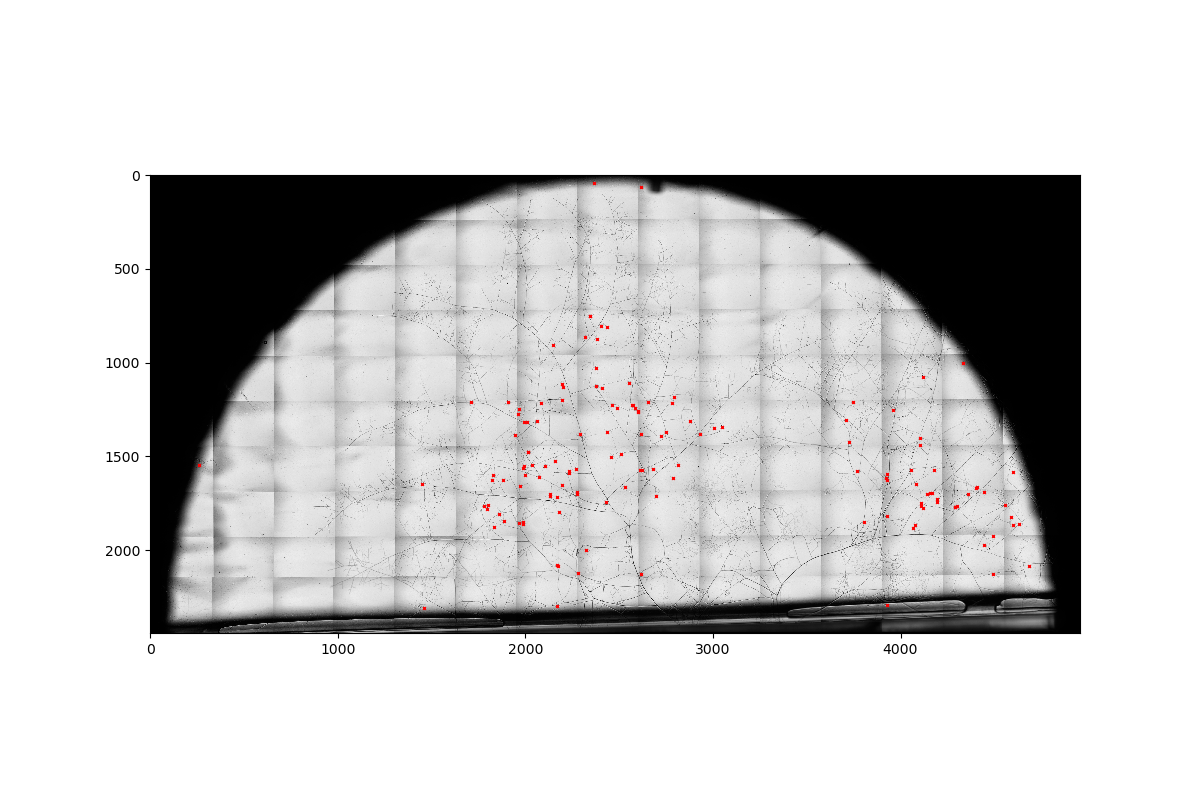

In [55]:
%load_ext autoreload
%autoreload 2
t = 60
exp.load_tile_information(t)
select = exp.folders
table = select.loc[select["unique_id"] == plate]
table = table.sort_values(by="datetime", ascending=True)
path = os.path.join(exp.directory, table["folder"].iloc[t])
spore_data = sio.loadmat(os.path.join(path, "Analysis", "spores.mat"))["spores"]
to_remove = set()
for i in range(len(spore_data)):
    distances = np.linalg.norm(spore_data[i][:2] - spore_data[:, :2], axis=1)
    index = np.argpartition(distances, 1)[1]
    if distances[index] < 10 and index < i:
        to_remove.add((i))
spore_filtered = np.delete(spore_data, list(to_remove), axis=0)
positions = [
    exp.timestep_to_general(np.flip(spore_filtered[i, :2]), t)
    for i in range(len(spore_filtered))
]
# positions = [np.flip((exp.timestep_to_general((spore_data[i,:2]),t))) for i in range(len(spore_data))]
fig = plot_full(
    exp,
    t,
    points=positions,
    downsizing=10,
    # edges=get_all_edges(exp, t),
    # edges = [],
    dilation=4,
    prettify=False,
    dpi=100,
    save_path=path,
)

In [56]:
positions

[array([  401.52333504, 23630.08897445]),
 array([  603.75947514, 26161.33438745]),
 array([ 7491.34353531, 23431.61287414]),
 array([ 9054.73089077, 21444.70868014]),
 array([ 8599.24162946, 23182.02464778]),
 array([ 7494.70810822, 23432.12412153]),
 array([ 8747.76105707, 23815.40754648]),
 array([ 8095.1340734 , 24323.42076492]),
 array([ 8034.04986995, 24043.76966644]),
 array([12451.27253083, 19653.41759752]),
 array([12083.26798967, 17107.02966995]),
 array([12063.95303508, 19067.76673441]),
 array([12154.04200359, 20808.40531181]),
 array([11990.18657215, 21924.04378327]),
 array([11281.43104562, 22011.43037549]),
 array([11153.36634396, 21928.97868585]),
 array([12562.03109   , 25993.61249748]),
 array([12412.88114788, 24888.58638245]),
 array([12405.34709859, 25837.13523518]),
 array([12241.74387285, 25674.15058353]),
 array([12237.77481634, 25751.74097358]),
 array([12229.69561791, 24622.61032231]),
 array([11347.09025827, 24058.17007318]),
 array([11221.01047438, 23761.0882

In [32]:
spore_data

array([[2.61832259e+04, 6.09762634e+02, 1.30000000e+01],
       [4.33469647e+04, 1.00287860e+04, 2.50000000e+01],
       [4.59762869e+04, 1.58400785e+04, 1.50000000e+01],
       [4.49350334e+04, 1.92581887e+04, 1.60000000e+01],
       [2.61254883e+04, 2.12729857e+04, 1.60000000e+01],
       [2.61281345e+04, 2.12719542e+04, 1.40000000e+01],
       [4.68430834e+04, 2.08784866e+04, 2.80000000e+01],
       [1.45752091e+04, 2.31027152e+04, 1.50000000e+01],
       [3.96602527e+04, 2.24289891e+04, 1.20000000e+01]])

In [15]:
[(exp.timestep_to_general((spore_data[i, :2]), t)) for i in range(len(spore_data))][0]

array([  879.88902033, 23153.07976824])

In [16]:
[((spore_data[i, :2])) for i in range(len(spore_data))][0]

array([  884.0614624 , 23148.37353516])

In [18]:
exp.image_coordinates[t]

[[28.576294, 13157.013],
 [33.834106500000004, 16290.994],
 [26.1566163, 19528.0115],
 [23.411011000000002, 22765.934],
 [16.026489, 26009.321000000004],
 [8.585449, 29253.142],
 [0.0, 32488.038],
 [2433.857294, 9918.345000000001],
 [2429.804294, 13049.013410000001],
 [2423.636094, 16292.510600000001],
 [2420.733494, 19527.5096],
 [2415.951294, 22767.563000000002],
 [2410.040694, 26009.198],
 [2403.449294, 29252.417],
 [2399.569694, 32487.036],
 [2397.625094, 35721.339],
 [4826.482994, 6685.378700000001],
 [4825.4229940000005, 9808.9627],
 [4821.750294, 13043.20526],
 [4818.370694, 16286.667300000001],
 [4814.180794000001, 19529.436],
 [4809.408294000001, 22766.687],
 [4803.424294, 26009.065000000002],
 [4798.963994000001, 29249.755],
 [4794.712994, 32486.868000000002],
 [4791.336294000001, 35722.585],
 [4788.886294000001, 38958.242],
 [7238.370294, 3465.4400000000005],
 [7233.840894000001, 6576.852000000001],
 [7230.920994, 9803.9954],
 [7228.364894, 13040.495480000001],
 [7225.039294

In [ ]:
fig, ax = plt.subplots()
ax.scatter(
    (select["datetime"] - select["datetime"].iloc[0]) / pd.Timedelta("1h"),
    tot_spore_volume,
)
ax.set_xlabel("time(h)")
ax.set_ylabel("total volume of spores ($\mu m^3$)")

In [ ]:
spore_volumes_array = np.array(tot_spore_volume)
d_biomass = 1100  # kg.m-3
d_biomass = d_biomass * 1e-18  # kg.um-3
d_biomass = d_biomass * 1e6  # mg.um-3

m_wet = spore_volumes_array * d_biomass
r_dw = 0.3
m_dry = m_wet * r_dw

In [ ]:
fig, ax = plt.subplots()
ax.scatter(
    (select["datetime"] - select["datetime"].iloc[0]) / pd.Timedelta("1h"), m_dry
)
ax.set_xlabel("time(h)")
ax.set_ylabel("total dry mass of spores ($mg$)")

ValueError: x and y must be the same size

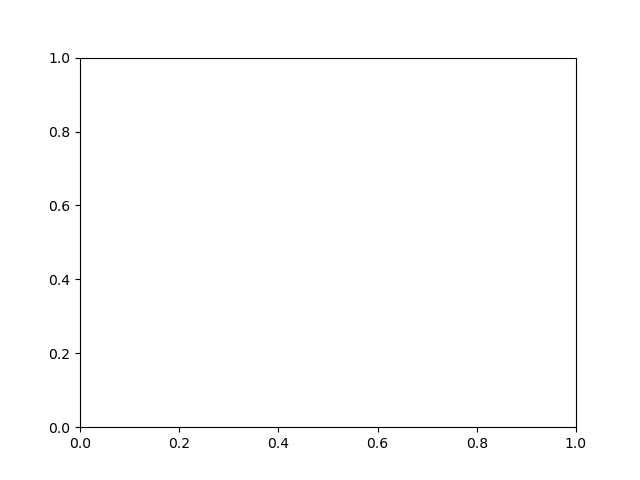

In [6]:
fig, ax = plt.subplots()
ax.scatter(
    (select["datetime"] - select["datetime"].iloc[0]) / pd.Timedelta("1h"), num_spore
)
ax.set_xlabel("time(h)")
ax.set_ylabel("number of spores")